In [6]:
import pickle
import sklearn as sk
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [7]:
RA=[1, 5, 44, 48, 50, 60, 71, 74, 82, 91, 105, 115, 119, 120, 132, 137, 140, 141, 150, 153, 173, 201, 203, 208, 220, 221, 226, 233, 234, 248, 273, 275, 285, 286, 294, 296, 306, 308, 318, 341, 360, 375, 377, 414, 418, 436, 451, 455, 480, 484, 489, 494, 517, 523, 528, 534, 557, 565, 568, 570, 572, 575, 581, 591, 613, 633, 637, 661, 672, 694, 710, 712, 718, 722, 733, 734, 748, 752, 760, 761, 766, 771, 781, 782, 785, 787, 793, 796, 803, 815, 838, 842, 859, 869, 870, 872, 875, 879, 882, 892, 895, 912, 917, 918, 921, 930, 936, 945, 972, 987, 989, 992, 996]

RW=[1,6,44,48,60,71,74,82,91,115,119,120,132,137,140,141,150,173,201,203,208,220,221,226,233,234,248,285,286,294,296,306,308,318,341,351,360,375,377,436,451,455,480,484,489,494,517,528,534,557,565,568,570,572,575,581,613,633,637,661,672,694,710,712,718,722,734,748,752,760,761,766,771,781,782,785,787,793,796,803,815,838,842,859,869,870,872,875,879,882,892,895,897,910,917,918,921,930,936,942,972,987,989,992,997]

HM=[1,44,48,60,71,74,82,91,95,115,120,125,132,137,140,141,150,153,161,173,184,201,203,208,220,221,226,233,234,248,285,286,296,306,308,318,320,341,360,375,377,414,436,451,480,484,489,494,517,528,534,557,565,568,570,581,613,633,637,657,661,672,694,710,712,734,752,760,761,766,771,781,782,793,796,803,815,838,842,859,869,870,872,875,882,892,893,895,897,912,917,918,936,972,987,989,996]

JF=[1, 5, 15, 44, 48, 50, 60, 71, 74, 82, 91, 105, 113, 115, 120, 131, 132, 137, 140, 141, 150, 171, 184, 201, 203, 208, 220, 221, 226, 233, 234, 248, 250, 253, 273, 275, 285, 286, 294, 296, 298, 306, 308, 316, 318, 323, 341, 360, 373, 377, 418, 436, 455, 484, 489, 494, 517, 528, 534, 557, 565, 568, 570, 572, 613, 633, 661, 672, 694, 710, 712, 722, 734, 752, 760, 761, 766, 771, 781, 782, 785, 786, 787, 793, 796, 803, 815, 830, 838, 842, 859, 869, 870, 872, 875, 879, 882, 892, 893, 897, 917, 918, 921, 930, 935, 936, 945, 972, 987, 989, 996]

UW_phase 91
AR_phase 546
Holroyd_phase 37
RA_phase 113
RW_phase 105
HM_phase 97
JF_phase 111
agreed-upon particles: 939
all humans 78
UW f1: 0.63
UW f1 ice: 0.97
UW f1 liq: 0.63
correct # of ice: 861
correct # of liq: 78.0
ambiguous particles: 61
UW correctly ID liq: 47
UW false positive liq: 24
UW false negative liq: 31
UW precision: 0.66
UW recall: 0.60
UW_f1: 0.6308724832214764
AR f1: 0.26
Holroyd f1: 0.44


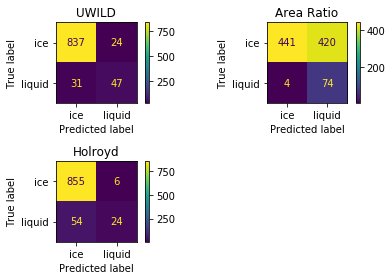

In [24]:
class_data = pickle.load(open('/home/disk/eos12/ratlas/SOCRATES/ML/save_files/manual_classification', 'rb'))

human_class = {k:v for k,v in class_data.items() if k in ['RA_phase', 'RW_phase', 'HM_phase', 'JF_phase']}
[print(k, int(np.sum(v))) for k,v in class_data.items() if not k=='UW_certainty']
all_human_prob = sum([v for v in human_class.values()])/4
all_human_class = (all_human_prob>0.5).astype(float)
all_human_class[np.abs(all_human_prob-0.5)<=0.25] = np.nan

print("agreed-upon particles:", np.sum(~np.isnan(all_human_class)))
# print(

all_human_agree = (all_human_prob==1).astype(float)

print('all humans', int(np.nansum(all_human_class)))
shifted_UW_phase = np.append(class_data['UW_phase'][1:], 0)
shifted_AR_phase = np.append(class_data['AR_phase'][1:], 0)
shifted_Holroyd_phase  = np.append(class_data['Holroyd_phase'][1:], 0)
# actual_uw_cert = class_data['UW_certainty'].copy()
# actual_uw_cert[class_data['UW_phase']==0] = 0.5-actual_uw_cert[class_data['UW_phase']==0]

UW_f1 = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)])
UW_f1_ice = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)], pos_label=0)
UW_f1_liq = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)], pos_label=1)
AR_f1 = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_AR_phase[~np.isnan(all_human_class)])
HO_f1 = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_Holroyd_phase[~np.isnan(all_human_class)])

print(f'UW f1: {UW_f1:0.2f}')
print(f'UW f1 ice: {UW_f1_ice:0.2f}')
print(f'UW f1 liq: {UW_f1_liq:0.2f}')
n_correct_ice = np.nansum(np.logical_not(all_human_class))
n_correct_liq = np.nansum(all_human_class)
n_ambig = np.nansum(np.isnan(all_human_class))
n_UW_correct_liq_id = np.nansum(np.logical_and(all_human_class==1, shifted_UW_phase==1))
n_UW_liq_false_positives = np.nansum(np.logical_and(all_human_class==0, shifted_UW_phase==1))
n_UW_liq_false_negatives = np.nansum(np.logical_and(all_human_class==1, shifted_UW_phase==0))
UW_precision = n_UW_correct_liq_id/(n_UW_correct_liq_id+n_UW_liq_false_positives)
UW_recall = n_UW_correct_liq_id/(n_UW_correct_liq_id+n_UW_liq_false_negatives)
print(f'correct # of ice: {n_correct_ice}')
print(f'correct # of liq: {n_correct_liq}')
print(f'ambiguous particles: {n_ambig}')

print(f'UW correctly ID liq: {n_UW_correct_liq_id}')
print(f'UW false positive liq: {n_UW_liq_false_positives}')
print(f'UW false negative liq: {n_UW_liq_false_negatives}')
print(f'UW precision: {UW_precision:0.2f}')
print(f'UW recall: {UW_recall:0.2f}')
print(f'UW_f1: {2*UW_precision*UW_recall/(UW_precision+UW_recall)}')
print(f'AR f1: {AR_f1:0.2f}')
print(f'Holroyd f1: {HO_f1:0.2f}')
cm = confusion_matrix(y_true = all_human_class[~np.isnan(all_human_class)],
                 y_pred=shifted_UW_phase[~np.isnan(all_human_class)])
cm_ar = confusion_matrix(y_true = all_human_class[~np.isnan(all_human_class)],
                 y_pred=shifted_AR_phase[~np.isnan(all_human_class)])
cm_ho = confusion_matrix(y_true = all_human_class[~np.isnan(all_human_class)],
                 y_pred=shifted_Holroyd_phase[~np.isnan(all_human_class)])
cmd = ConfusionMatrixDisplay(cm, display_labels=['ice', 'liquid'])
cmd_ar = ConfusionMatrixDisplay(cm_ar, display_labels=['ice', 'liquid'])
cmd_ho = ConfusionMatrixDisplay(cm_ho, display_labels=['ice', 'liquid'])

fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(nrows=2, ncols=2)#, sharex=True, sharey=True)

cmd.plot(ax=ax0, values_format='0.0f')
ax0.set_title('UWILD')
cmd_ar.plot(ax=ax1, values_format='0.0f')
ax1.set_title('Area Ratio')
cmd_ho.plot(ax=ax2, values_format='0.0f')
ax2.set_title('Holroyd')
ax3.axis('off')
fig.tight_layout()

fig.savefig('confusion_matrices.png', dpi=600)


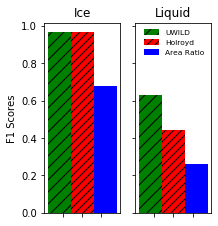

In [25]:
x = np.arange(1)  # the label locations
width = 0.30  # the width of the bars

UWILD_ice = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)], pos_label=0)
UWILD_liq = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)], pos_label=1)
EOL_ice = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_AR_phase[~np.isnan(all_human_class)], pos_label=0)
EOL_liq = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_AR_phase[~np.isnan(all_human_class)], pos_label=1)
UIOOPS_ice = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_Holroyd_phase[~np.isnan(all_human_class)], pos_label=0)
UIOOPS_liq = f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_Holroyd_phase[~np.isnan(all_human_class)], pos_label=1)

fig, axes = plt.subplots(1,2,figsize=(3, 3.5),sharey=True)
rects1 = axes[0].bar(x - width, [UWILD_ice], width, label='UWILD',color='g',hatch='//')
rects2 = axes[0].bar(x, [UIOOPS_ice], width, label='Holroyd',color='r',hatch='///')
rects3 = axes[0].bar(x + width, [EOL_ice], width, label='Area Ratio',color='b')
rects4 = axes[1].bar(x - width,[UWILD_liq], width, label='UWILD',color='g',hatch='//')
rects5 = axes[1].bar(x,[UIOOPS_liq], width, label='Holroyd',color='r',hatch='///')
rects6 = axes[1].bar(x + width, [EOL_liq], width, label='Area Ratio',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
axes[0].set_ylabel('F1 Scores')
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
# axes[0].set_xlabel([])
# axes[1].set_xlabel('manual \n test set')
axes[0].set_title('Ice')
axes[1].set_title('Liquid')
axes[1].legend(['UWILD','Holroyd','Area Ratio'],fontsize=7.5,\
               loc='upper right',frameon=False)
plt.savefig('figure7_testset.png', dpi=600)


In [4]:
y_titles = np.array(['log10_iat','area_ratio', 'fine_detail_ratio', 'max_hole_diameter',
            'edge_at_max_hole','percent_shadow_area','perimeter','eq_diameter',
            'max_dimension','touching_edge','max_bottom_edge_touching',
            'max_top_edge_touching','area','width','length'][::-1])
y_titles

array(['length', 'width', 'area', 'max_top_edge_touching',
       'max_bottom_edge_touching', 'touching_edge', 'max_dimension',
       'eq_diameter', 'perimeter', 'percent_shadow_area',
       'edge_at_max_hole', 'max_hole_diameter', 'fine_detail_ratio',
       'area_ratio', 'log10_iat'], dtype='<U24')

In [117]:
f1_score(y_true=all_human_class[~np.isnan(all_human_class)], y_pred=shifted_UW_phase[~np.isnan(all_human_class)])

0.6308724832214764